In [9]:
from scipy import signal
import numpy as np
from scipy.fftpack import fft, ifft
import pandas as pd

import matplotlib
matplotlib.use('nbagg')
from pylab import rcParams
rcParams['figure.figsize'] = 9, 4
import matplotlib.pyplot as plt
import scipy

%load_ext autoreload
%autoreload 2
import sys
import copy

from pyha import Hardware, simulate, sims_close, Complex, resize, hardware_sims_equal
from pathlib import Path
from data import load_iq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


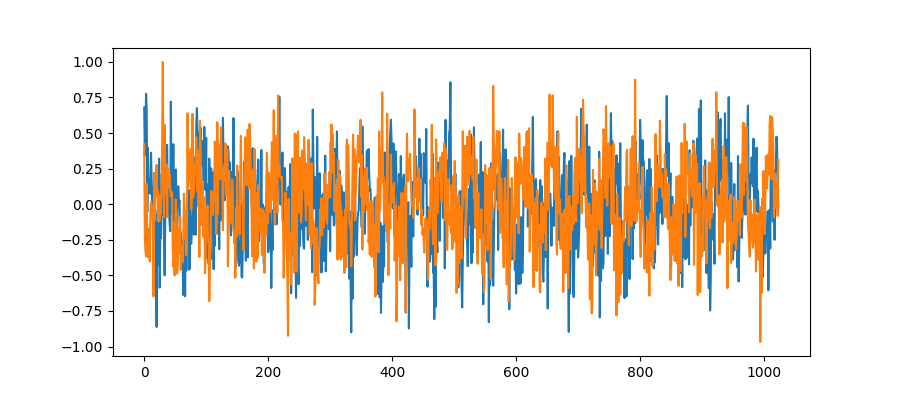

In [10]:
np.random.seed(0)
fft_size = 1024
sig = np.exp(2j*np.pi*np.linspace(0, 1, fft_size) * 1000)
noise = np.random.normal(size=len(sig)) + np.random.normal(size=len(sig))*1j
sig = sig + noise

# keep sig in -1..1 range
sig = sig / (max(sig.max(), abs(sig.min())))

plt.plot(sig.real)
plt.plot(sig.imag)
plt.show()

In [13]:
from pyhacores.filter import MovingAverage
dut = MovingAverage(window_len=8)
sim_out = simulate(dut, sig, simulations=['MODEL', 'PYHA', 'RTL'])
assert sims_close(sim_out)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 1025/1025 [00:00<00:00, 4670.42it/s]

INFO:sim:OK!
INFO:sim:Running "RTL" simulation...
INFO:conversion:Creating top.vhd ...


INFO:conversion:MovingAverage to VHDL ...
INFO:sim:Running COCOTB & GHDL simulation....
INFO:sim:VHDL stdout: 
    make results.xml
    make[1]: Entering directory '/tmp/tmpbrghqhak'
    mkdir -p coco_sim
    cd coco_sim && /home/gaspar/git/pyha/ghdl/bin/ghdl -a --std=08 --work=work /tmp/tmpbrghqhak/src/util/complex.vhdl /tmp/tmpbrghqhak/src/util/float.vhdl /tmp/tmpbrghqhak/src/util/complex_float.vhdl /tmp/tmpbrghqhak/src/util/pyha_util.vhdl /tmp/tmpbrghqhak/src/util/typedefs.vhdl /tmp/tmpbrghqhak/src/MovingAverage_0.vhd /tmp/tmpbrghqhak/src/top.vhd && /home/gaspar/git/pyha/ghdl/bin/ghdl -e --std=08 --work=work top
    cd coco_sim; \
    PYTHONPATH=/home/gaspar/git/pyha/cocotb/build/libs/x86_64:/home/gaspar/git/pyha/cocotb:/home/gaspar/git/pyhacores:/tmp/tmpbrghqhak LD_LIBRARY_PATH=/home/gaspar/git/pyha/cocotb/build/libs/x86_64::/home/gaspar/miniconda3/lib:/home/gaspar/miniconda3/lib:/home/gaspar/miniconda3/lib:/home/gaspar/miniconda3/lib MODULE=cocotb_simulation_top \
            TEST

<IPython.core.display.Javascript object>


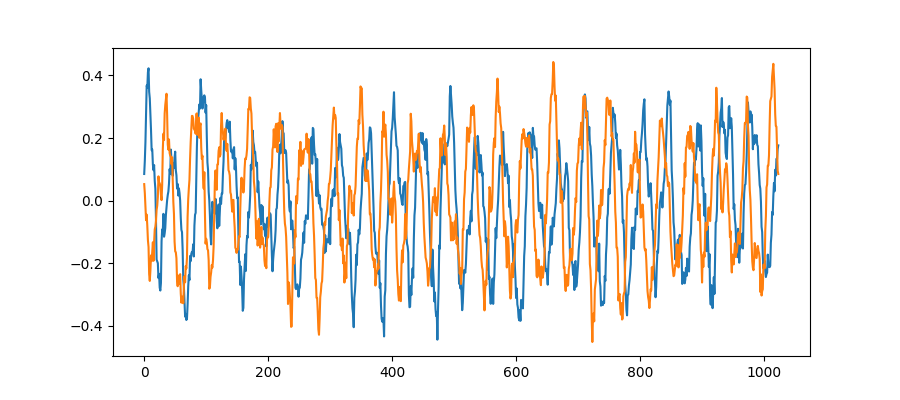

In [14]:
plt.plot(np.array(sim_out['MODEL']).real)
plt.plot(np.array(sim_out['MODEL']).imag)
plt.show()